### MNIST Handwriting
MNIST stands for the Modified National Institute of Standards and Technology. The dataset used in this project contains 250 handwriting styles, split into 60,000 train and 10,000 test images. The extended MNIST dataset contains 240,000 train and 40,000 test

In [11]:
detach("package:keras", unload = TRUE)

In [12]:
install.packages("keras")

package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alif-\AppData\Local\Temp\RtmpKiONMF\downloaded_packages


In [13]:
keras::install_keras()


Installation complete.



In [3]:
library(keras)
use_backend("tensorflow")

Warning message:
"package 'keras' was built under R version 3.6.3"

In [4]:
mnist <- dataset_mnist()

In [5]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [6]:
# store training data
train_x <- mnist$train$x
train_y <- mnist$train$y

# store test data
test_x <- mnist$test$x
test_y <- mnist$test$y

In [7]:
table(train_y, train_y)

       train_y
train_y    0    1    2    3    4    5    6    7    8    9
      0 5923    0    0    0    0    0    0    0    0    0
      1    0 6742    0    0    0    0    0    0    0    0
      2    0    0 5958    0    0    0    0    0    0    0
      3    0    0    0 6131    0    0    0    0    0    0
      4    0    0    0    0 5842    0    0    0    0    0
      5    0    0    0    0    0 5421    0    0    0    0
      6    0    0    0    0    0    0 5918    0    0    0
      7    0    0    0    0    0    0    0 6265    0    0
      8    0    0    0    0    0    0    0    0 5851    0
      9    0    0    0    0    0    0    0    0    0 5949

In [8]:
table(test_y, test_y)

      test_y
test_y    0    1    2    3    4    5    6    7    8    9
     0  980    0    0    0    0    0    0    0    0    0
     1    0 1135    0    0    0    0    0    0    0    0
     2    0    0 1032    0    0    0    0    0    0    0
     3    0    0    0 1010    0    0    0    0    0    0
     4    0    0    0    0  982    0    0    0    0    0
     5    0    0    0    0    0  892    0    0    0    0
     6    0    0    0    0    0    0  958    0    0    0
     7    0    0    0    0    0    0    0 1028    0    0
     8    0    0    0    0    0    0    0    0  974    0
     9    0    0    0    0    0    0    0    0    0 1009

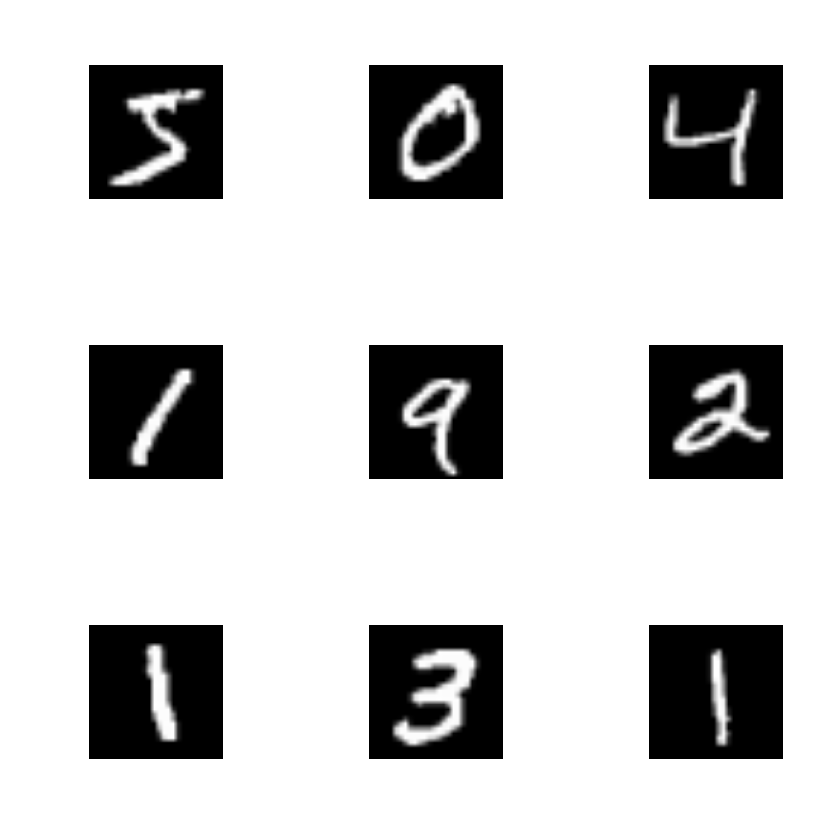

In [9]:
# Plot images
par(mfrow = c(3,3))
for (i in 1:9) plot(as.raster(train_x[i,,], max = 255))

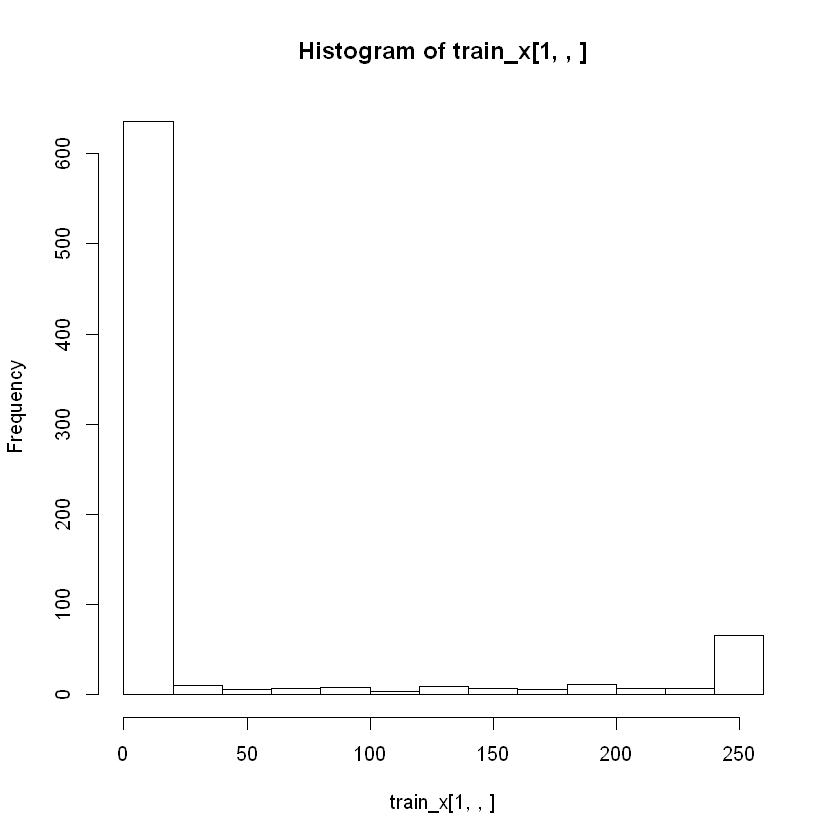

In [10]:
hist(train_x[1,,])

In [11]:
str(train_x)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [12]:
# Unroll training examples from matrices to single vector
train_x <- array_reshape(train_x, c(nrow(train_x), 784))
str(train_x)

 num [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...


In [13]:
str(test_x)

 int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...


In [14]:
# Unroll test examples from matrices to single vector
test_x <- array_reshape(test_x, c(nrow(test_x), 784))
str(test_x)

 num [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...


In [15]:
# Normalize train and test data so values range from 0 to 1
train_x <- train_x / 255
test_x <- test_x / 255

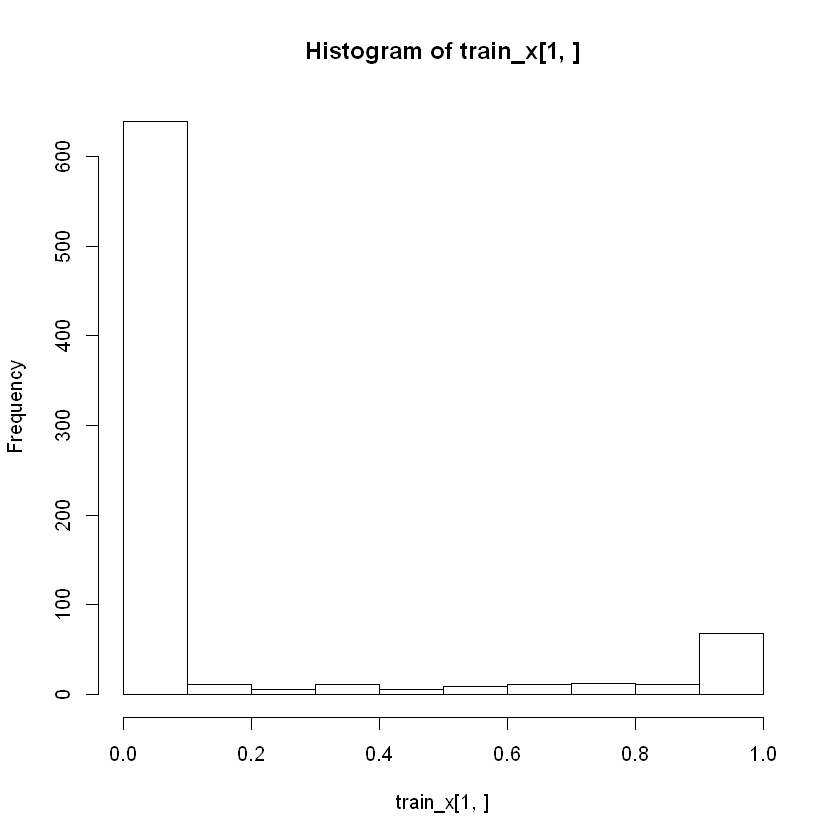

In [16]:
hist(train_x[1,])

In [17]:
train_y[1]

[1] 5

In [18]:
# One hot encoding
train_y <- to_categorical(train_y, 10)
test_y <- to_categorical(test_y, 10)

In [19]:
train_y[1,]

[1] 0 0 0 0 0 1 0 0 0 0

In [20]:
# Create model
model <- keras_model_sequential()
model %>%
    layer_dense(units=128, activation="relu", input_shape=c(784)) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     100480      
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      1290        
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
________________________________________________________________________________


In [21]:
# Compile model
model %>%
    compile(loss="categorical_crossentropy",
           optimizer=optimizer_rmsprop(),
           metrics="accuracy")

In [22]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


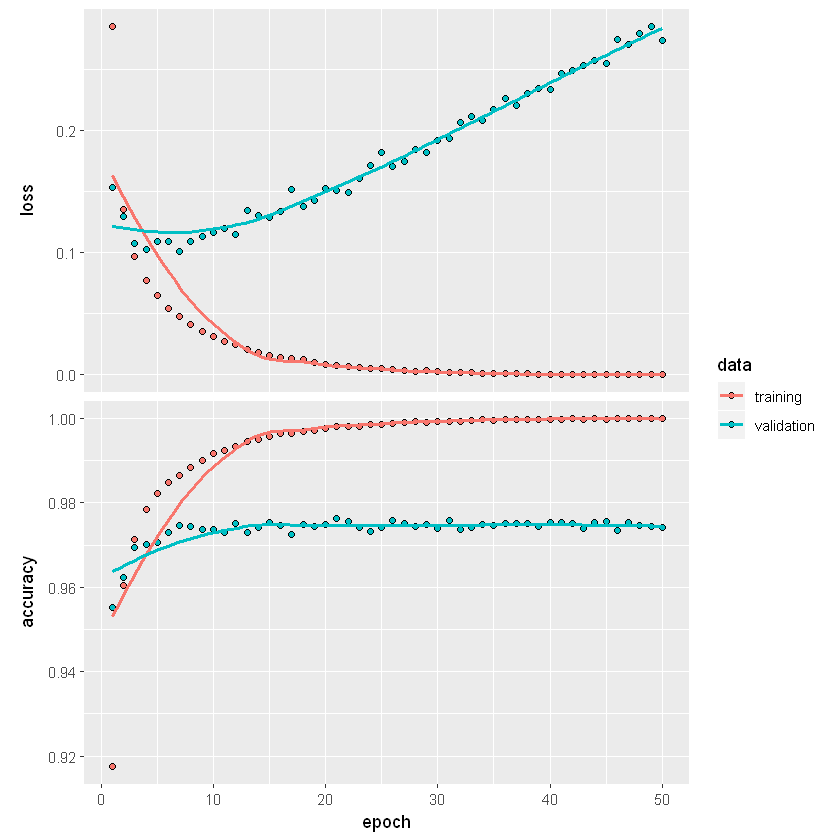

In [25]:
plot(history)

In [19]:
# Improve model
model <- keras_model_sequential()
model %>%
    layer_dense(units=128, activation="relu", input_shape=c(784)) %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=64, activation="relu") %>%
    layer_dropout(rate=0.2) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     100480      
________________________________________________________________________________
dropout (Dropout)                   (None, 128)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      650         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________

In [20]:
model %>%
    compile(loss="categorical_crossentropy",
           optimizer=optimizer_rmsprop(),
           metrics="accuracy")

In [21]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


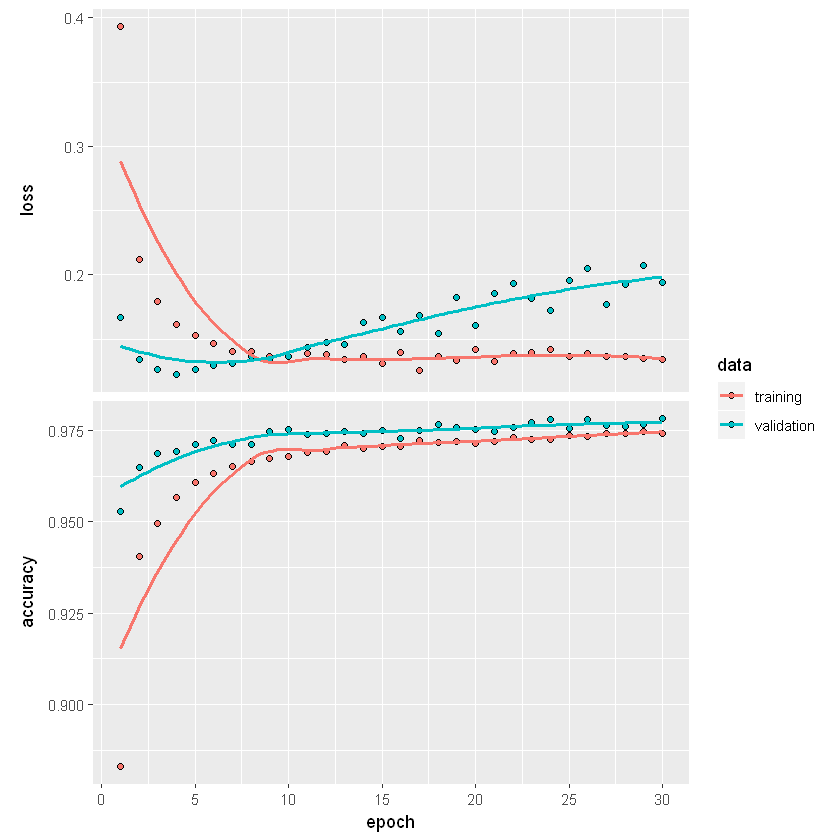

In [21]:
plot(history)

In [22]:
# Evaluation and prediction on test data
model %>% evaluate(test_x, test_y)

loss  accuracy 
0.2034409 0.9746000

In [24]:
# Create confusion matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = mnist$test$y)

         Actual
Predicted    0    1    2    3    4    5    6    7    8    9
        0  971    0    2    0    1    2    6    2    7    5
        1    1 1122    3    0    1    0    3    7    1    5
        2    1    3 1010    8    6    0    0   13    3    0
        3    0    1    2  987    0    7    1    6    6    5
        4    0    0    4    0  955    2    6    0    4    9
        5    1    1    0    8    0  870    4    0   14    2
        6    3    2    2    0    3    6  934    0    3    0
        7    1    0    5    4    4    1    0  992    5    5
        8    1    6    4    2    2    2    4    2  927    0
        9    1    0    0    1   10    2    0    6    4  978

In [25]:
# Probabilities
prob <- model %>% predict_proba(test_x)
cbind(prob, Predicted = pred, Actual = mnist$test$y)[1:5,]

,,,,,,,,,,Predicted,Actual
0.000000e+00,0.000000e+00,2.569127e-28,1.230663e-24,0.000000e+00,4.480586e-34,0.000000e+00,1.000000e+00,0.000000e+00,2.274963e-31,7,7
0.000000e+00,6.741208e-34,1.000000e+00,6.244580e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2,2
9.143721e-35,1.000000e+00,4.277748e-14,4.059695e-15,6.499437e-15,2.656243e-16,6.058126e-20,1.815451e-12,7.208062e-16,5.132646e-20,1,1
9.999958e-01,2.234672e-14,3.523777e-06,2.868547e-08,2.517026e-08,7.909184e-09,5.297597e-07,3.951018e-08,1.907003e-10,2.379552e-08,0,0
8.945152e-14,2.011149e-15,7.554611e-08,2.220335e-10,9.996631e-01,1.072682e-09,9.184033e-16,5.324551e-06,6.987994e-15,3.313567e-04,4,4


In [26]:
# Making the network deeper
model <- keras_model_sequential()
model %>%
    layer_dense(units=256, activation="relu", input_shape=c(784)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=128, activation="relu") %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=64, activation="relu") %>%
    layer_dropout(rate=0.2) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropou

In [27]:
# Compile model
model %>%
    compile(loss="categorical_crossentropy",
           optimizer=optimizer_rmsprop(),
           metrics="accuracy")

In [28]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


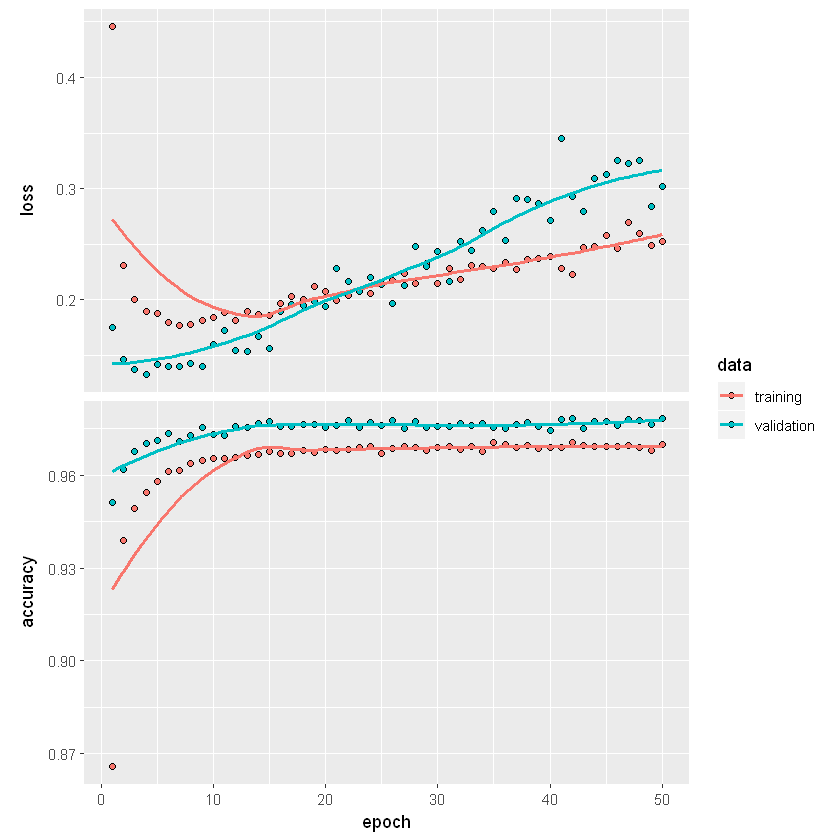

In [29]:
# Plot history
plot(history)

In [30]:
# Evaluate model
model %>% evaluate(test_x, test_y)

loss  accuracy 
0.2763763 0.9765000

In [22]:
# Trying a different architecture
model <- keras_model_sequential()
model %>%
    layer_dense(units=512, activation="relu", input_shape=c(784)) %>%
    layer_dropout(rate=0.4) %>%
    layer_dense(units=256, activation="relu") %>%
    layer_dropout(rate=0.3) %>%
    layer_dense(units=10, activation="softmax")
summary(model)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_2 (Dense)                     (None, 512)                     401920      
________________________________________________________________________________
dropout (Dropout)                   (None, 512)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 256)                     131328      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 10)                      2570        
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_______________

In [23]:
# Compile model
model %>%
    compile(loss="categorical_crossentropy",
            optimizer=optimizer_rmsprop(),
            metrics="accuracy")

In [24]:
# Fit model
history <- model %>%
    fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


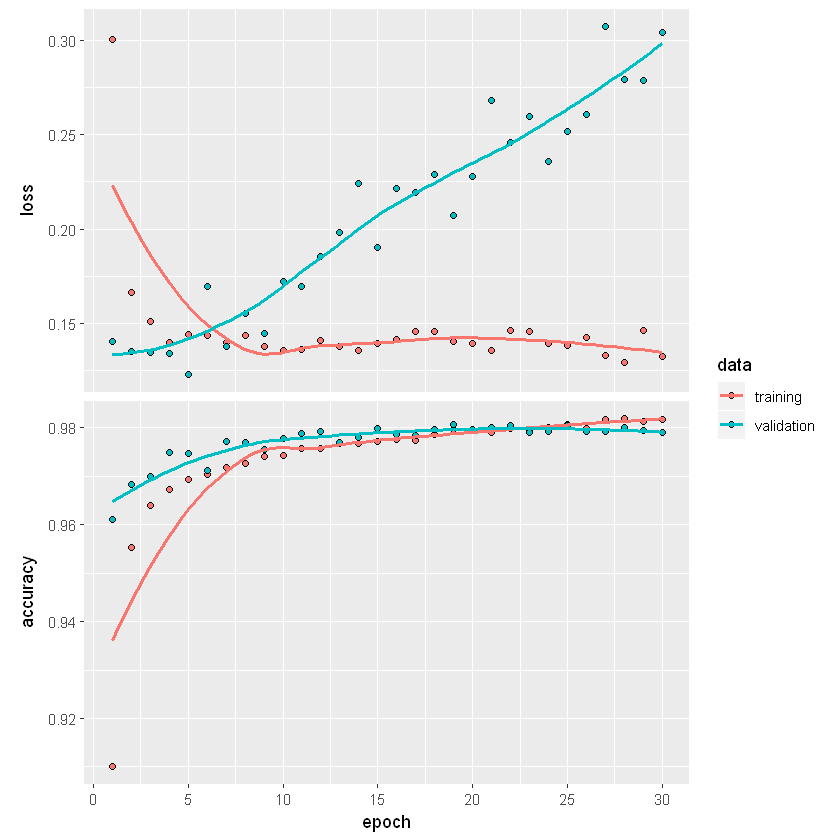

In [26]:
# Plot history
plot(history)

In [25]:
# Evaluate model
model %>% evaluate(test_x, test_y)

loss  accuracy 
0.2347873 0.9813000

In [27]:
# Confusion matrix
pred <- model %>% predict_classes(test_x)
table(Predicted = pred, Actual = mnist$test$y)

         Actual
Predicted    0    1    2    3    4    5    6    7    8    9
        0  968    0    2    2    0    2    4    0    3    2
        1    1 1126    0    0    0    0    1    3    2    4
        2    1    3 1016    8    4    0    0    7    1    0
        3    0    0    1  976    0    3    0    0    1    2
        4    1    0    1    0  963    1    3    0    4    7
        5    2    1    0    6    0  868    2    0    2    2
        6    4    2    2    0    3    9  946    0    2    1
        7    1    0    6    8    2    1    0 1014    3    5
        8    2    3    4    5    1    5    2    1  951    1
        9    0    0    0    5    9    3    0    3    5  985